
# <span style="color:rgb(213,80,0)">Tutorial 5 \- Simulate CC\-CV Cycling</span>

## Introduction

In this tutorial, we will use a P2D model to simulate CC\-CV cycling. After completing this tutorial, you should have a working knowledge of:

-  How to define and modify cycling protocols in BattMo

We'll use the same model from Tutorial 1.


In [1]:
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Parameters are defined in the JSON parameter file and parsed into the MATLAB structure. Once the JSON file has been read into MATLAB as a jsonstruct, its properties can be modified programmatically.

## Explore the Control Definition

Let's begin by reviewing the control protocol in BattMo, with the command:


In [2]:
disp(jsonstruct.Control)

         controlPolicy: 'CCDischarge'
                 DRate: 1
    lowerCutoffVoltage: 3
    upperCutoffVoltage: 4.1000
             dIdtLimit: 0.0100
             dEdtLimit: 0.0100
            rampupTime: 0.1000


We see that the default control protocol is set to a constant current (galvanostatic) discharge. To change to a CC\-CV cycling protocol, we can use the command:


In [3]:
cccv_control_protocol = parseBattmoJson('cccv_control.json');
jsonstruct_modified = mergeJsonStructs({cccv_control_protocol, jsonstruct});

mergeJsonStructs: Parameter Control.controlPolicy is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.lowerCutoffVoltage is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.upperCutoffVoltage is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dIdtLimit is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dEdtLimit is assigned twice with different values. Value from first jsonstruct is used.


Now we can explore the modified control protocol definition with the command:


In [4]:
disp(jsonstruct_modified.Control)

         controlPolicy: 'CCCV'
        initialControl: 'discharging'
        numberOfCycles: 5
                 CRate: 0.5000
                 DRate: 1
    lowerCutoffVoltage: 2.8000
    upperCutoffVoltage: 4.2000
             dIdtLimit: 2.0000e-06
             dEdtLimit: 2.0000e-06
            rampupTime: 0.1000


Let's run the simulation and plot the cell voltage curve.


In [5]:
% run the simulation
output = runBatteryJson(jsonstruct_modified);

Solving timestep 001/135:          -> 15 Seconds, 625 Milliseconds
| It # | ctrl_EIequation (cell) | ctrl_controlEquation (cell) | ne_co_am_sd_massCons (cell) | ne_co_am_sd_solidDiffusionEq (cell) | ne_co_chargeCons (cell) | pe_co_am_sd_massCons (cell) | pe_co_am_sd_solidDiffusionEq (cell) | pe_co_chargeCons (cell) | elyte_chargeCons (cell) | elyte_massCons (cell) |
|    1 | 3.01e-03               |*0.00e+00                    |*0.00e+00                    |*0.00e+00                            |*0.00e+00                |*0.00e+00                    |*0.00e+00                            |*0.00e+00                |*0.00e+00                |*0.00e+00              |
|    2 |*9.20e-13               |*0.00e+00                    | 5.59e-02                    | 5.59e-02                            | 4.46e-02                | 1.84e-02                    | 1.84e-02                            | 1.32e-02                | 1.01e-01                | 5.72e-02              |
|    3 |*9.20e-13          


get the states



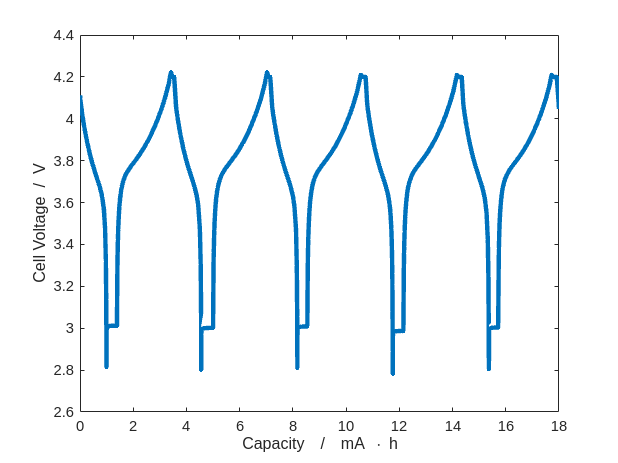

In [6]:
states = output.states;

% extract the time and voltage quantities
time = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);
current = cellfun(@(state) state.('Control').I, states);

% calculate the capacity
capacity = time .* current;

% plot the discharge curve in the figure
plot(time/hour, voltage, '-', 'linewidth', 3)

% add plot annotations
xlabel('Capacity  /  mA \cdot h')
ylabel('Cell Voltage  /  V')

## Summary

In this tutorial, we explored how to modify material parameters in BattMo.

